## Electronic structure calculations using VQE

Electronic structure calculations play a fundamental role in quantum chemistry and materials science, enabling us to determine the energy levels and properties of molecules. One of the most promising methods to solve these problems in the quantum computing domain is the **Variational Quantum Eigensolver (VQE)**. This hybrid quantum-classical algorithm is particularly suited for near-term quantum computers, which are still limited by noise and qubit coherence times.

The VQE method seeks to find the ground-state energy of a molecular system by combining quantum and classical techniques. At its core, the VQE algorithm leverages the **variational principle**, which states that the expectation value of the Hamiltonian (the operator corresponding to the total energy of the system) for any trial quantum state is an upper bound to the ground-state energy. The task, then, is to minimize this expectation value over a set of quantum states parameterized by a quantum circuit.

A typical VQE algorithm works by first constructing the Hamiltonian of the molecular system of interest. For example, in the case of the hydrogen molecule, the Hamiltonian can be represented as a sum of Pauli operators. This Hamiltonian is then measured on a quantum computer using a parameterized quantum circuit, such as the **EfficientSU2** ansatz, which generates a trial wavefunction. The parameters of the circuit are iteratively adjusted by a classical optimization routine to minimize the energy expectation value.

One of the significant advantages of VQE is its adaptability to various quantum hardware architectures. By keeping the quantum part of the algorithm minimal (i.e., calculating expectation values), it mitigates the effects of decoherence, which is a major challenge for near-term devices. Moreover, the classical part of the algorithm handles the optimization, making it computationally feasible even with current hardware limitations.

VQE method is expected to become even more powerful. The possibility of combining VQE with **error mitigation techniques** and larger quantum processors suggests that the method will play a crucial role in solving larger and more complex chemical systems in the future. Additionally, as new quantum algorithms for optimization emerge, they may enhance VQE's capabilities, pushing the boundaries of what quantum computers can achieve in the realm of chemistry and materials science.

VQE algorithm offers a practical and efficient approach for performing electronic structure calculations on quantum computers. By harnessing the power of quantum and classical computing, it opens new possibilities for exploring molecular properties and reaction mechanisms with unprecedented precision. This makes VQE a vital tool in the advancement of quantum chemistry and materials discovery.

#### Variational Quantum Eigensolver (VQE) Mathematical Formula

The goal of the VQE algorithm is to find the ground state energy $E_0$ of a molecular Hamiltonian $H$, which can be represented as:

$$
H = \sum_{i} c_i P_i
$$

Where:
- $H$ is the Hamiltonian of the system.
- $c_i$ are the coefficients.
- $P_i$ are tensor products of Pauli operators (e.g., $I, X, Y, Z$).

The VQE algorithm minimizes the expectation value of the Hamiltonian with respect to a variational quantum state $\psi(\theta)$, where $\theta$ are the parameters of the quantum circuit (e.g., ansatz):

$$
E(\theta) = \langle \psi(\theta) | H | \psi(\theta) \rangle
$$

The variational principle guarantees that the energy $E(\theta)$ is always greater than or equal to the ground state energy $E_0$:

$$
E(\theta) \geq E_0
$$

The task is to adjust the parameters $\theta$ to minimize $E(\theta)$, and the minimum value obtained is an approximation of the ground state energy $E_0$.

Finally, the optimization problem can be summarized as:

$$
E_0 = \min_{\theta} E(\theta) = \min_{\theta} \langle \psi(\theta) | H | \psi(\theta) \rangle
$$

In [1]:
# Import necessary libraries from Qiskit
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp, Statevector, partial_trace
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_city
from qiskit_algorithms import VQE
from qiskit.circuit.library import EfficientSU2
from qiskit.primitives import Estimator
from qiskit_algorithms.optimizers import COBYLA
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Create a molecular Hamiltonian (H2 example)
# Define the Pauli operators for the Hamiltonian (simplified for H2 molecule)
pauli_list = [SparsePauliOp.from_list([("II", -1.052373245772859), ("IZ", 0.39793742484318045),
                                       ("ZI", -0.39793742484318045), ("ZZ", -0.01128010425623538),
                                       ("XX", 0.18093119978423156)])]

In [3]:
# Define quantum circuit ansatz for VQE (EfficientSU2 ansatz)
num_qubits = 2
ansatz = EfficientSU2(num_qubits)

In [4]:
# Define the VQE solver
optimizer = COBYLA(maxiter=100)

In [5]:
# Initialize simulator
simulator = AerSimulator()

In [6]:
# Find the ground state
vqe = VQE(Estimator(), ansatz, optimizer)
vqe_result = vqe.compute_minimum_eigenvalue(operator=pauli_list[0])

print(f"Computed Ground State Energy: {vqe_result.eigenvalue.real}")

Computed Ground State Energy: -1.8565421885885667


In [7]:
# Step 4: Bind parameters to the ansatz and create the circuit for visualization
params = np.random.rand(ansatz.num_parameters_settable)
qc = ansatz.assign_parameters(params)

In [8]:
#  Decompose the ansatz to standard gates for the AerSimulator
qc = qc.decompose()

In [9]:
# Simulate the state
qc.save_statevector()  # Save statevector for later retrieval
job = simulator.run(qc)
result = job.result()

In [10]:
# Retrieve the statevector from the result
state = result.get_statevector(qc)  # Specify the circuit explicitly

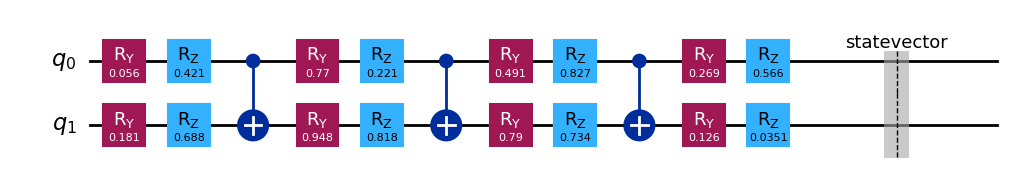

In [11]:
# MPL circuit diagram
qc.draw(output='mpl')
plt.show()

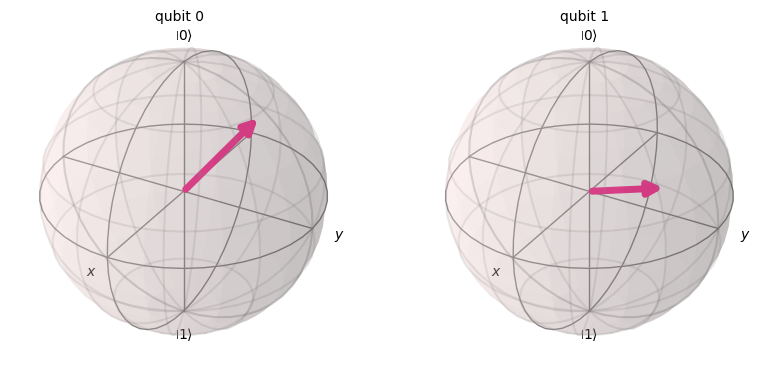

In [12]:
# Bloch sphere visualization
statevector = Statevector(state)
plot_bloch_multivector(statevector)
plt.show()

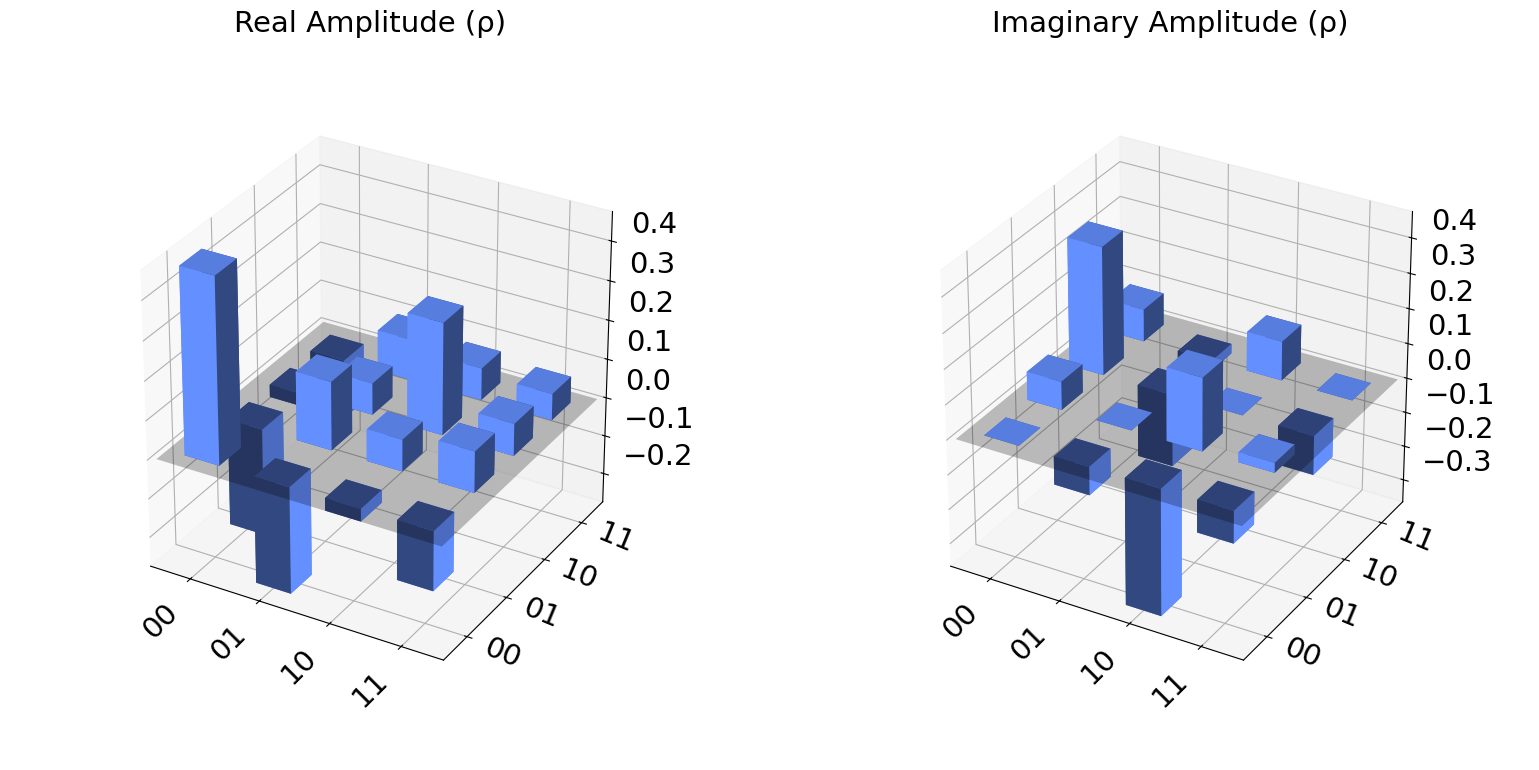

In [13]:
#  State City visualization
plot_state_city(statevector)
plt.show()

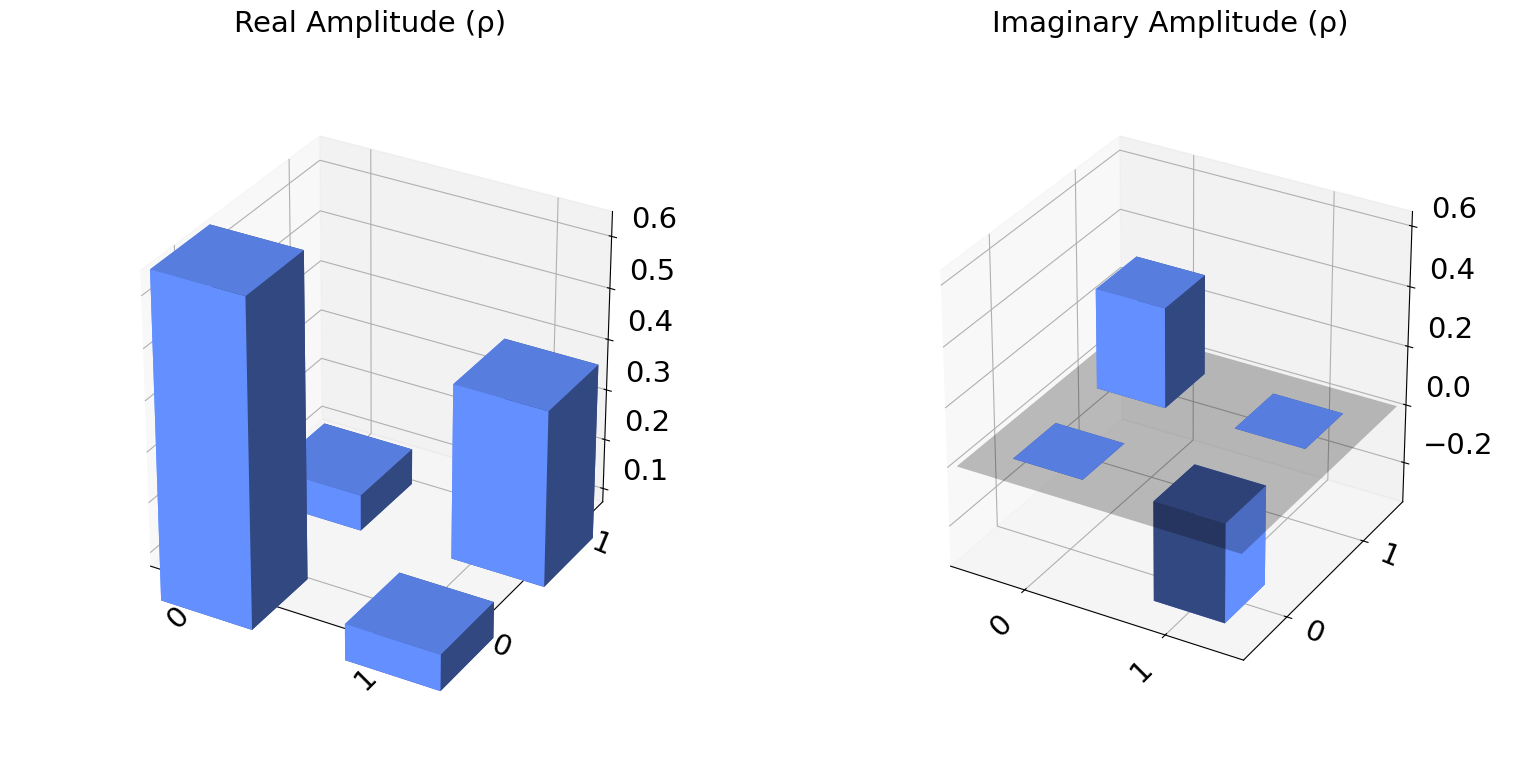

In [14]:
# Partial trace (for reduced density matrix)
reduced_density_matrix = partial_trace(statevector, [0])
plot_state_city(reduced_density_matrix)
plt.show()

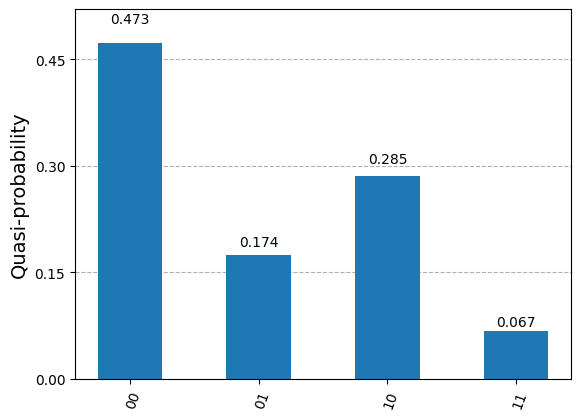

In [15]:
# Histogram of measurement outcomes
counts = result.get_counts(qc)
plot_histogram(counts)
plt.show()

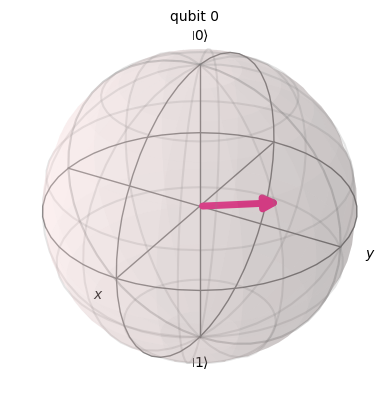

In [16]:
# Partial trace Bloch sphere (for reduced qubit state visualization)
plot_bloch_multivector(reduced_density_matrix)
plt.show()